# Day 11 In-class Assignment: Get the Lead Out: Understanding The Water Crisis in Flint, MI

### <p style="text-align: right;"> &#9989; Put your name here.</p> Yash Kalani

#### <p style="text-align: right;"> &#9989; Put your group member names here.</p>  Tiff, Tre, Sussana 

<div align="center"><img src="https://assets1.cbsnewsstatic.com/hub/i/r/2017/09/21/d348dfb2-b44c-49de-95c5-893fdf143ce6/thumbnail/620x349/d43e72275d7f4c4966124cfd9e66e22a/0921-eve-flinthearing-reynolds.jpg" width=600px></div>


## Learning Goals:

By the end of this assignment you should be able to:
* Use Pandas to filter data to select particular subsets of interest
* Articulate, based on your own perception, what you thinks makes a data visualization "good" versus "bad"
* Use data to support a claim or make an argument

## Assignment instructions

Work with your group to complete this assignment. Instructions for submitting this assignment are at the end of the notebook. The assignment is due at the end of class.

---
# Background and motivation

Today we want you to think about what the data is telling you, but still use coding to help you; and, use some of the visualization ideas you explored above. We'll be looking at the publicly released [Flint Water Quality dataset](http://flintwaterstudy.org/2015/12/complete-dataset-lead-results-in-tap-water-for-271-flint-samples/). The water testing method involves collecting three different bottles worth of water.

**Review the properties of the data, read the descriptions of the data fields, and review what the Evironmental Protection Agency (EPA) limits are on lead in water supplies.**

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# Loading the data
flint_data = pd.read_csv('flint_water_data.csv')

Double-check that your data loaded correctly by displaying the first first lines.

In [3]:
# Put your code here

flint_data.head()


,SampleID,Zip Code,Ward,PbBottle1_ppb,PbBottle2_ppb,PbBottle3_ppb,Notes
0,1,48504,6,0.344,0.226,0.145,NaN
1,2,48507,9,8.133,10.770,2.761,NaN
2,4,48504,1,1.111,0.110,0.123,NaN
3,5,48507,8,8.007,7.446,3.384,NaN
4,6,48505,3,1.951,0.048,0.035,NaN


#### Description of data fields in this data set:

- *SampleID*: Unique study code for each sample
- *Zip Code*: location where samples were collected
- *Ward*: location where samples were collected
- *PbBottle1_ppb*: Concentration of lead in parts per billion (ppb) in sample acquired at initial turn on of water
- *PbBottle2_ppb*: Concentration of lead in parts per billion (ppb) in sample acquired after 45 seconds of flushing water
- *PbBottle3_ppb*: Concentration of lead in parts per billion (ppb) in sample acquired after 120 seconds of flushing water


#### EPA Limits (i.e. how does the EPA define unsafe lead levels in a water supply?)


The U.S. Environmental Protection Agency (EPA) guidelines about lead contaminants state:

> Lead and copper are regulated by a treatment technique that requires systems to control the corrosiveness of their water. **If more than 10% of tap water samples exceed the action level,** water systems must take additional steps. For copper, the action level is 1.3 mg/L (1300 ppb), and **for lead is 0.015 mg/L (15 ppb).** 
>
> Source: (http://www.epa.gov/your-drinking-water/table-regulated-drinking-water-contaminants#seven). 




---
## 1. Analysis Using Descriptive Statistics
### 1.1
#### &#9989;&nbsp; Use `describe()` function to determine the mean, standard deviation, min, median, and max of the first set of samples (`PbBottle1_ppb`). 

In [18]:
# Write your code here
print(flint_data.describe())

print(flint_data["PbBottle1_ppb"].median())


         SampleID      Zip Code        Ward  PbBottle1_ppb  PbBottle2_ppb  \
count  270.000000    270.000000  270.000000     270.000000     270.000000   
mean   151.055556  48505.107407    5.325926      10.658593       6.446704   
std     86.406624      3.119602    2.665572      21.599817      23.157891   
min      1.000000  48502.000000    0.000000       0.344000       0.032000   
25%     77.250000  48503.000000    3.000000       1.574500       0.457500   
50%    149.500000  48505.000000    6.000000       3.502500       1.397500   
75%    224.750000  48506.000000    8.000000       9.175000       4.720500   
max    300.000000  48532.000000    9.000000     158.000000     259.800000   

       PbBottle3_ppb  
count     270.000000  
mean        3.669344  
std        10.557109  
min         0.031000  
25%         0.306000  
50%         0.820000  
75%         2.750750  
max        94.520000  
3.5025


### 1.2
#### &#9989;&nbsp; From this information alone, can you determine if the water supply in Flint met the EPA standard?

<font size="+3" color="green">&#9998;</font> *Write your answer here

no we cant because the top 25% is at 9.17 which is below the 15 ppb threshold, since we dont have the top 10% we can't be sure what the water supply value. 

### 1.3
#### &#9989;&nbsp; What is the median of this sample? How does it compare to the mean? Do you expect this sample to be close to a normal (Gaussian) distribution? (think back on your pre-class assignment about the properties of normal distributions)

<font size="+3" color="green">&#9998;</font> *Write your answer here*
3.5025 median and 10.658 mean this means that dataset is skewed right and there are large outliers on the right

---
## 2. Analysis Using Visualizations
### 2.1

#### &#9989;&nbsp; Make a histogram visualization of the distribution of the first set of samples (`PbBottle1_ppb`). Use the `axvline()` function to add a line showing where the EPA limit is. (You will may need to us google to remind yourself what this function does.)

Also, make sure that your plot has x and y-axes labels and a title.

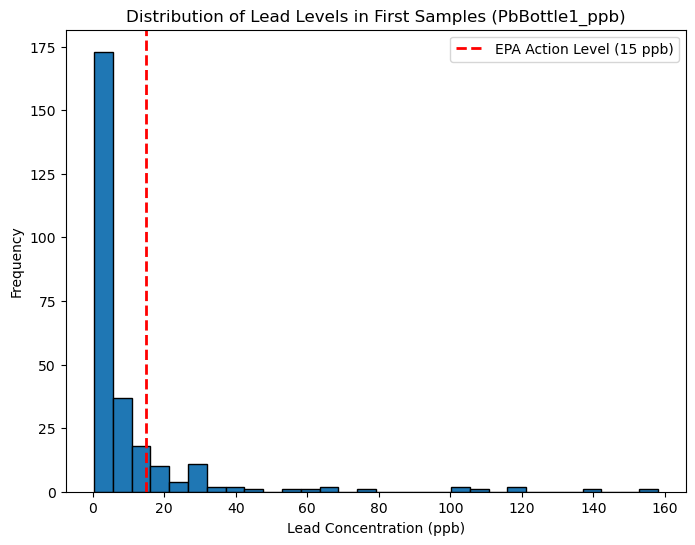

In [19]:
# Write your code here

import matplotlib.pyplot as plt
import pandas as pd

# Convert column to numeric (in case there are strings like '*house sampled twice')
flint_data["PbBottle1_ppb"] = pd.to_numeric(flint_data["PbBottle1_ppb"], errors="coerce")

# Plot histogram
plt.figure(figsize=(8,6))
plt.hist(flint_data["PbBottle1_ppb"].dropna(), bins=30, edgecolor="black")

# Add EPA limit line at 15 ppb
plt.axvline(x=15, color="red", linestyle="--", linewidth=2, label="EPA Action Level (15 ppb)")

# Labels and title
plt.xlabel("Lead Concentration (ppb)")
plt.ylabel("Frequency")
plt.title("Distribution of Lead Levels in First Samples (PbBottle1_ppb)")
plt.legend()

plt.show()


### 2.2
#### &#9989;&nbsp; Does the distribution of samples look like a normal (Gaussian) distribution? Is that what you predicted based on your analysis of the descriptive statistics (Part 1.3)?

<font size="+3" color="green">&#9998;</font> *Write your answer here*

no it's not normal, yes i knew it was going to be skewed left

### 2.3
#### &#9989;&nbsp; Looking at this, there’s a big pile up of samples that are near or below the EPA limit, and it makes it hard to get a sense of what the full distribution looks like. Use `plt.yscale()` to make the y-axis logarithmic. 

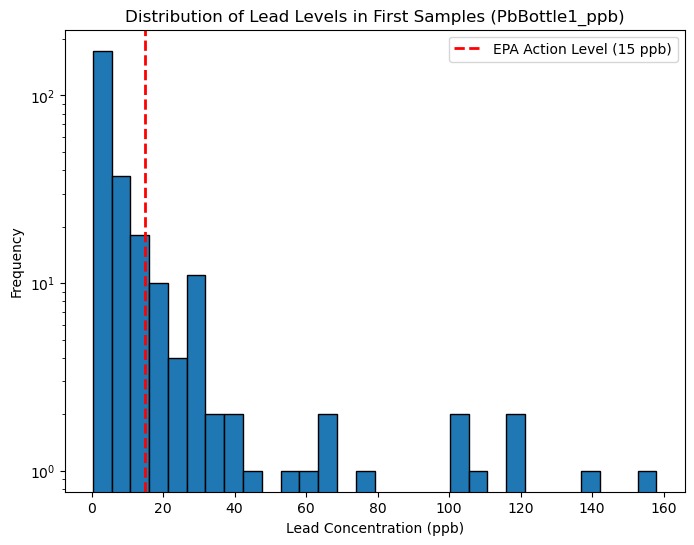

In [22]:
# Write your code here
# Write your code here

import matplotlib.pyplot as plt
import pandas as pd

# Convert column to numeric (in case there are strings like '*house sampled twice')
flint_data["PbBottle1_ppb"] = pd.to_numeric(flint_data["PbBottle1_ppb"], errors="coerce")

# Plot histogram
plt.figure(figsize=(8,6))
plt.hist(flint_data["PbBottle1_ppb"].dropna(), bins=30, edgecolor="black")

# Add EPA limit line at 15 ppb
plt.axvline(x=15, color="red", linestyle="--", linewidth=2, label="EPA Action Level (15 ppb)")

plt.yscale("log")
# Labels and title
plt.xlabel("Lead Concentration (ppb)")
plt.ylabel("Frequency")
plt.title("Distribution of Lead Levels in First Samples (PbBottle1_ppb)")
plt.legend()

plt.show()




### 2.4
#### &#9989;&nbsp; As discussed in the pre-class, logarithmic scales allow us to get a better handle on distributions with a *large dynamic range*. Use your log plot estimate the number of samples that lie above the EPA limit by counting the number of samples that fall into the bins that are above the limit.

What fraction of the total samples appear to fall above the EPA limit?

<font size="+3" color="green">&#9998;</font> *Write your answer here*

about half of the samples

### 2.5
#### &#9989;&nbsp; Based on this analysis, does it appear that the Flint samples met the EPA standards?

<font size="+3" color="green">&#9998;</font> *Write your answer here*

absolutely not its definetely over the limit


# STOP

#### &#9989;&nbsp; Based on your analysis so far, answer the following question: ***Would you feel comfortable drinking a glass of water in Flint at the height of the water crisis?***

<font size="+3" color="green">&#9998;</font> *Write your answer here*

No, I would not

---
## 3. Analysis Using Masks

In the previous part, you used descriptive statistics and a visualization to try to estimate the number of samples that fell above the EPA limit. Now we’re going to actually count the number that actually don’t meet the EPA regulation. 

### 3.1

#### &#9989;&nbsp; Task
First, let's step back from the Flint Water data and try a masking example. The cell below contains a small DataFrame with randomly generted data that is similar to the real data you are working with. Write some code that creates a mask on the `'test_bottle1'` column for values greater than 15 and print out that mask (you should see `True` where the condition is met and `False` where it isn't).

In [23]:
# here is some test data!
data = {
    'Zipcode': [25687, 27734, 45253, 23558, 11378, 94490, 38385, 11324, 29878, 17790],
    'test_bottle1': [12.16, 11.73, 18.20, 7.15, 8.91, 9.63, 15.12, 0.72, 22.36, 13.12],
    'test_bottle2': [7.15, 11.17, 11.93, 13.49, 7.51, 12.47, 22.13, 24.57, 7.00, 13.42],
    'test_bottle3': [24.66, 9.53, 23.46, 14.63, 2.02, 1.74, 0.07, 4.29, 14.61, 5.24]
}

df_for_practice = pd.DataFrame(data)
df_for_practice

,Zipcode,test_bottle1,test_bottle2,test_bottle3
0,25687,12.16,7.15,24.66
1,27734,11.73,11.17,9.53
2,45253,18.20,11.93,23.46
3,23558,7.15,13.49,14.63
4,11378,8.91,7.51,2.02
5,94490,9.63,12.47,1.74
6,38385,15.12,22.13,0.07
7,11324,0.72,24.57,4.29
8,29878,22.36,7.00,14.61
9,17790,13.12,13.42,5.24


In [40]:
# put your code here

#### &#9989;&nbsp; Task

Now, create a new DataFrame (using your mask) that removes any rows **below** 15 and save it as a new variable. Then, display your DataFrame. How do you know your mask worked?

In [25]:
# put your code here

mask = df_for_practice["test_bottle1"] >= 15

df_filtered = df_for_practice[mask]

print(df_filtered)

   Zipcode  test_bottle1  test_bottle2  test_bottle3
2    45253         18.20         11.93         23.46
6    38385         15.12         22.13          0.07
8    29878         22.36          7.00         14.61


### 3.2

Now, back to our data! 

#### &#9989;&nbsp; Create a mask and a new dataframe that only contain samples where `PbBottle1_ppb` was greater than the EPA limit.

In [27]:
# Write your code here

mask = df_for_practice["test_bottle1"] >= 15
df_filtered = df_for_practice[mask]

print(df_filtered)
#7 greater than the limit


   Zipcode  test_bottle1  test_bottle2  test_bottle3
2    45253         18.20         11.93         23.46
6    38385         15.12         22.13          0.07
8    29878         22.36          7.00         14.61


### 3.3
#### &#9989;&nbsp; Answer the following questions: 
1. How many samples were above the EPA limit? 
2. What fraction of the total samples does this comprise? 

<font size="+3" color="green">&#9998;</font> *Write your answer here*

7 above the limit. 
30 values


### 3.4

#### &#9989;&nbsp; Based on this analysis, do these samples meet the EPA standards?

<font size="+3" color="green">&#9998;</font> *Write your answer here

no 7/30 is more than 10%

---
## 4. Extending Analysis to the Other Samples

#### &#9989;&nbsp; Repeat the analysis you did parts 1, 2, and 3 for both the `PbBottle2_ppb` and  `PbBottle3_ppb` samples. Recall that these are samples drawn 45 seconds after the taps are turned on (`PbBottle2_ppb`) and two minutes after the taps are turned on (`PbBottle3_ppb`). 
To complete this section, you should:
1. Fill in the table below with descriptive statistics and fraction of samples above the EPA limit.
2. Have a three panel plot showing the distribution of samples. The y-axes for each of them should be logarithmic and each plot should have x and y-axes labels and a title.


| Sample | Mean | Std. Dev | Min | Median | Max | Fraction > EPA |
| :----- | :----- | :------ | :----- | :----- | :----- | :----- |
| PbBottle1_ppb | ??| ?? | ??  | ?? | ?? | ?? |
| PbBottle2_ppb | ??| ?? | ??  | ?? | ?? | ?? |
| PbBottle3_ppb | ??| ?? | ??  | ?? | ?? | ?? |

In [29]:
# Write your code here
epa_limit = 15

# Build summary stats
summary = {}
for col in ["PbBottle1_ppb", "PbBottle2_ppb", "PbBottle3_ppb"]:
    series = flint_data[col].dropna()
    summary[col] = {
        "Mean": series.mean(),
        "Std. Dev": series.std(),
        "Min": series.min(),
        "Median": series.median(),
        "Max": series.max(),
        "Fraction > EPA": (series > epa_limit).mean()
    }

summary_table = pd.DataFrame(summary).T
print(summary_table)


                    Mean   Std. Dev    Min  Median     Max  Fraction > EPA
PbBottle1_ppb  10.658593  21.599817  0.344  3.5025  158.00        0.166667
PbBottle2_ppb   6.446704  23.157891  0.032  1.3975  259.80        0.062963
PbBottle3_ppb   3.669344  10.557109  0.031  0.8200   94.52        0.044444


## 5. Conclusions

#### &#9989;&nbsp; Based on your new analysis, answer the following question: ***Would you feel comfortable drinking a glass of water in Flint at the height of the water crisis?*** 

**Use statistical values and/or data visualizations to back up your choice.**

<font size="+3" color="green">&#9998;</font> *Write your answer here


maybe it is safe for 2/3 of the samples

## 6. (Time Permitting) Looking for Other Sources of Analysis

For your project, it will be good to draw upon other resources to compare your results/conclusions to. 

Go through the [following article from the New York Times](https://www.nytimes.com/2018/07/22/opinion/flint-lead-poisoning-water.html) and compare it's conclusions to your own from Part 5. Given the information in this article, ***Would you feel comfortable drinking a glass of water in Flint at the height of the water criss?*** 


**NOTE:** If you are an MSU student, you have access to a free New York Times account. [Click this link](https://asmsu.msu.edu/home/services/717-2/) and follow the steps to get access through MSU. 

<font size="+3" color="green">&#9998;</font> *Write your answer here*

Still not they say the water isn't dangerous but it's still a lot more dangerous then usual

---
## Assignment wrapup

Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!** 

In [30]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---

## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!

&#169; Copyright 2024,  The Department of Computational Mathematics, Science and Engineering at Michigan State University